In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Earthquakes

In [25]:
eq = pd.read_csv('earthquake.txt', sep=' ')

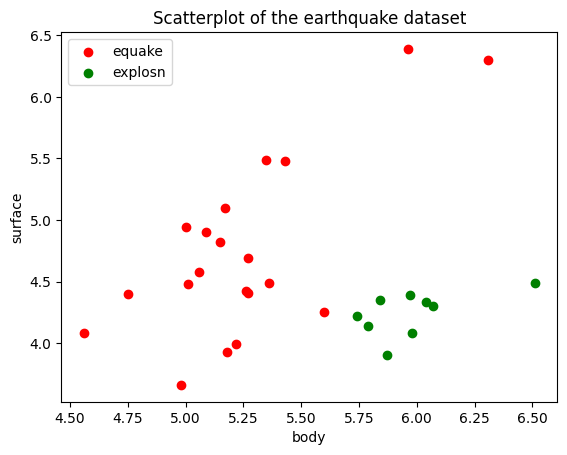

In [38]:
eq_1 = eq[eq['popn'] == 'equake'].iloc[:, 1:]
eq_0 = eq[eq['popn'] == 'explosn'].iloc[:, 1:]
plt.scatter(eq_1.iloc[:, 0], eq_1.iloc[:, 1], color='red')
plt.scatter(eq_0.iloc[:, 0], eq_0.iloc[:, 1], color='green')
plt.legend(['equake', 'explosn'])
plt.xlabel(eq_1.columns[0])
plt.ylabel(eq_1.columns[1])
plt.title('Scatterplot of the earthquake dataset')
plt.show()

In [28]:
X = eq.to_numpy()[:, 1:]
y = (eq.to_numpy()[:, 0] == 'equake').astype(int)

lr_raw = LogisticRegression(penalty=None)
lr_raw.fit(X, y)

lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(X, y)

lr_l2 = LogisticRegression(penalty='l2')
lr_l2.fit(X, y)

LogisticRegression()

In [29]:
def plot_decision(model, model_name):
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the class for each point in the grid
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlGn_r)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.RdYlGn_r)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions of {model_name}')
    plt.show()

In [47]:
def print_info(model, model_name):
    print(f'Intercept: {model.intercept_}')
    print(f'Coefficients: {model.coef_}')
    df = pd.DataFrame({'prediction': model.predict(X),'proba': model.predict_proba(X)[:, 1]})
    df = pd.concat([eq.loc[:, ['body', 'surface']], df], axis=1)
    return df

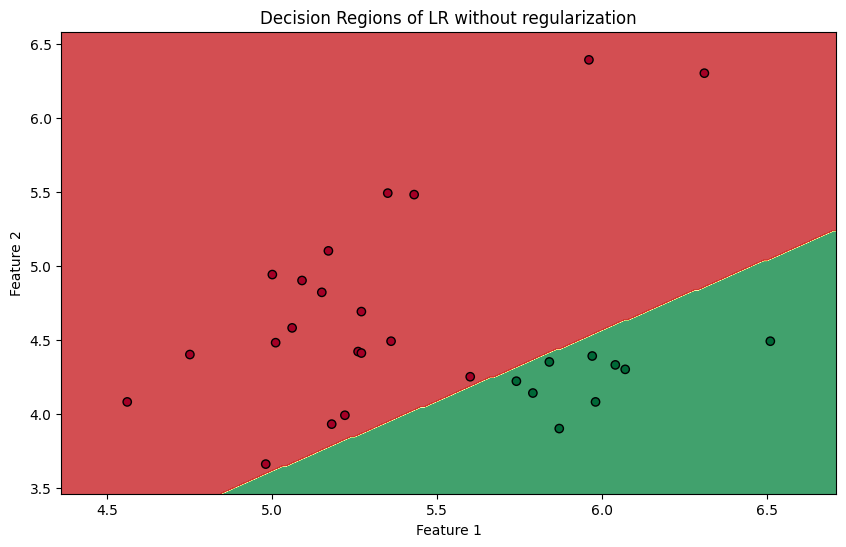

In [48]:
plot_decision(lr_raw, 'LR without regularization')

In [49]:
print_info(lr_raw, 'LR without regularization')

Intercept: [135.04765908]
Coefficients: [[-111.91608035  117.54515973]]


,body,surface,prediction,proba
0,5.60,4.25,1,9.996236e-01
1,5.18,3.93,1,1.000000e+00
2,6.31,6.30,1,1.000000e+00
3,5.36,4.49,1,1.000000e+00
4,5.96,6.39,1,1.000000e+00
5,5.26,4.42,1,1.000000e+00
6,5.17,5.10,1,1.000000e+00
7,4.75,4.40,1,1.000000e+00
8,5.35,5.49,1,1.000000e+00
9,5.01,4.48,1,1.000000e+00


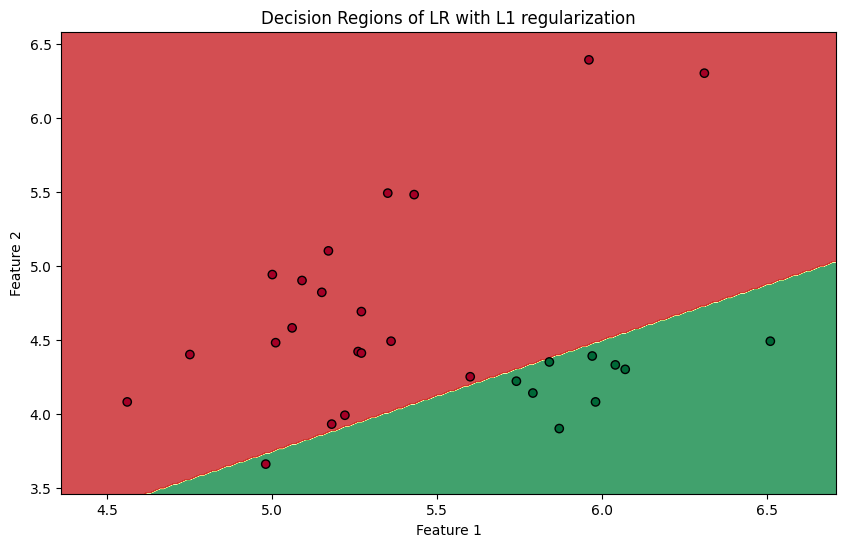

In [41]:
plot_decision(lr_l1, 'LR with L1 regularization')

In [42]:
print_info(lr_l1, 'lr_l1')

Intercept: [0.]
Coefficients: [[-1.98991005  2.65563215]]


,prediction,proba
0,1,0.535674
1,1,0.532181
2,1,0.984845
3,1,0.778659
4,1,0.993998
5,1,0.780908
6,1,0.962884
7,1,0.903149
8,1,0.980799
9,1,0.873004


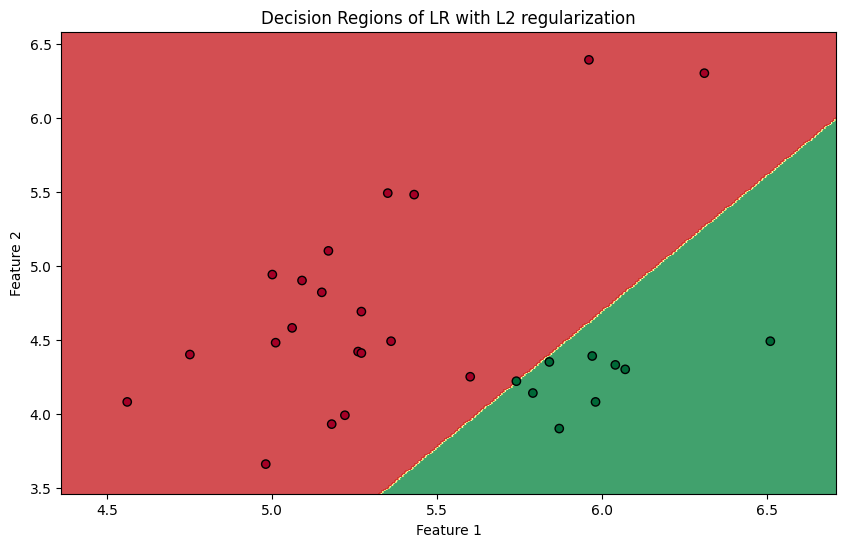

In [43]:
plot_decision(lr_l2, 'LR with L2 regularization')

In [44]:
print_info(lr_l2, 'lr_l2')

Intercept: [7.46937734]
Coefficients: [[-2.16922885  1.18171354]]


,prediction,proba
0,1,0.585157
1,1,0.706181
2,1,0.773177
3,1,0.759183
4,1,0.890116
5,1,0.782859
6,1,0.907308
7,1,0.914125
8,1,0.913062
9,1,0.869395


## Simulation

In [17]:
L = 100
dims = [3, 5]
n_list = list(range(50, 101, 10)) + list(range(200, 1001, 100))

In [20]:
data = []

for n in n_list:
    mse_list = {}
    for d in dims:
        mse_list[d] = []
    
    for i in range(L):
        X = np.random.multivariate_normal(mean=np.zeros(5), cov=np.eye(5), size=n)
        p = 1 / (1 + np.exp(-(0.5 + X.sum(axis=1))))
        y = np.random.binomial(1, p)
        for d in dims:
            X_d = X[:, :d]
            lr = LogisticRegression()
            lr.fit(X_d, y)
            coef, intercept = lr.coef_, lr.intercept_
            mse = ((0.5 - intercept)**2 + np.sum((coef - 1)**2)) / (d + 1)
            mse_list[d].append(mse)
    
    for d in dims:
        data.append({'n': n, 'MSE': np.mean(mse_list[d]), 'Num dims': d})

df_data = pd.DataFrame(data)

<Axes: xlabel='n', ylabel='MSE'>

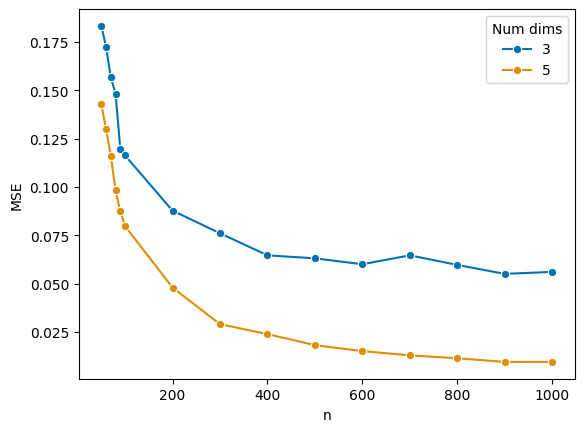

In [21]:
sns.lineplot(data=df_data, x='n', y='MSE', hue='Num dims', marker='o', palette='colorblind')